In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
from imblearn.combine import SMOTETomek



In [ ]:
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.drop(['id'], axis = 1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<p>We have missing values in bmi</p>

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


<h1>Explore data</h1?

In [11]:
df1 = df.copy()

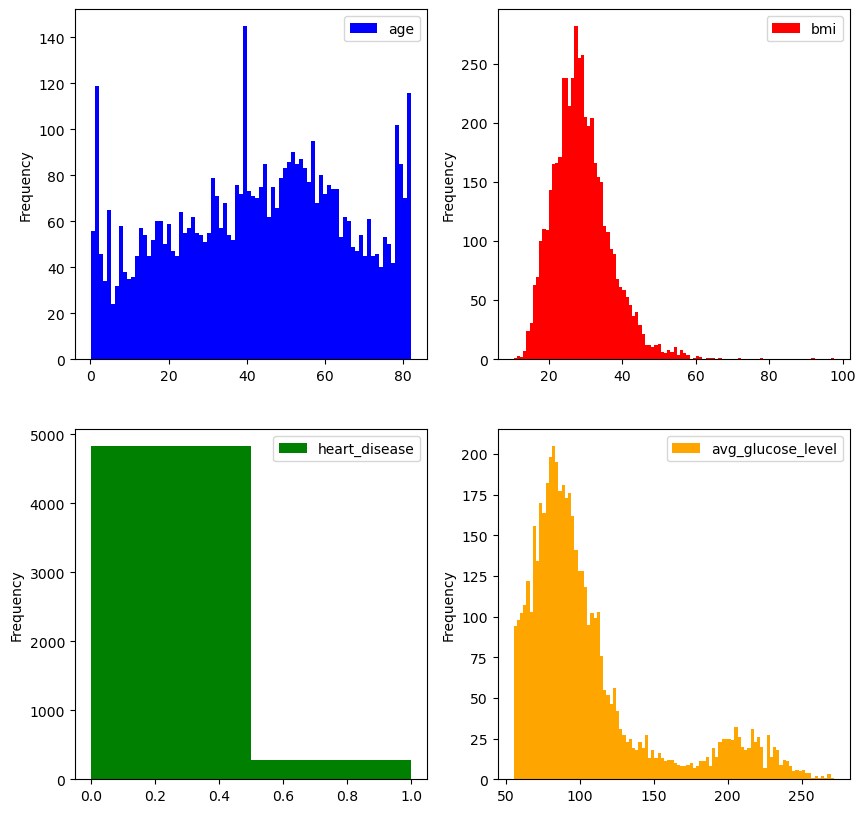

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
df1.plot(kind="hist", y="age", bins=80, color="b", ax=axes[0][0])
df1.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df1.plot(kind="hist", y="heart_disease", bins=2, color="g", ax=axes[1][0])
df1.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

* Good age distribution 
* we have some outliers in bmi


<h3>Stroke Pie Chart<h3>

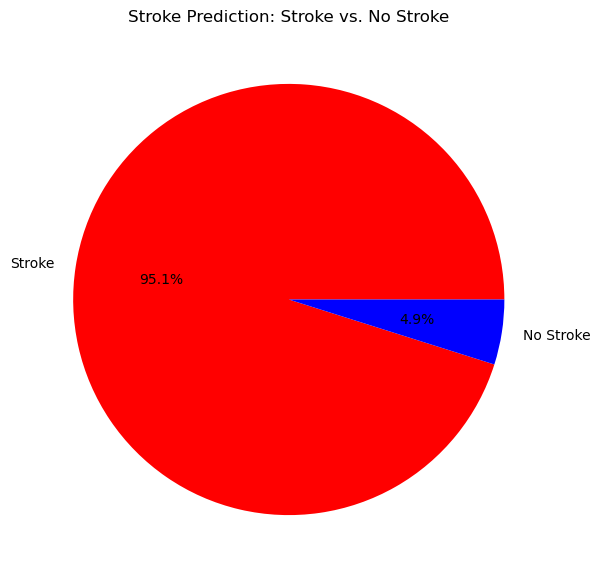

In [13]:
stroke_counts = df1['stroke'].value_counts()

labels = ['Stroke', 'No Stroke']

plt.figure(figsize=(7, 7))
plt.pie(stroke_counts, labels=labels, autopct='%1.1f%%' , colors=['red', 'blue'])
plt.title('Stroke Prediction: Stroke vs. No Stroke')
plt.show()

* Only 5% percent of people have Stroke !

<h3>Gender</h3>

<Axes: xlabel='gender', ylabel='count'>

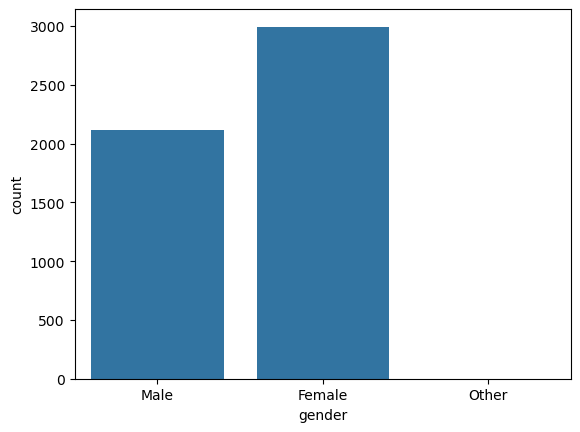

In [14]:
sns.countplot(data = df1 , x = 'gender')

* There is about 1000 diffrence between male and female 

<h3>Pair plot</h3>

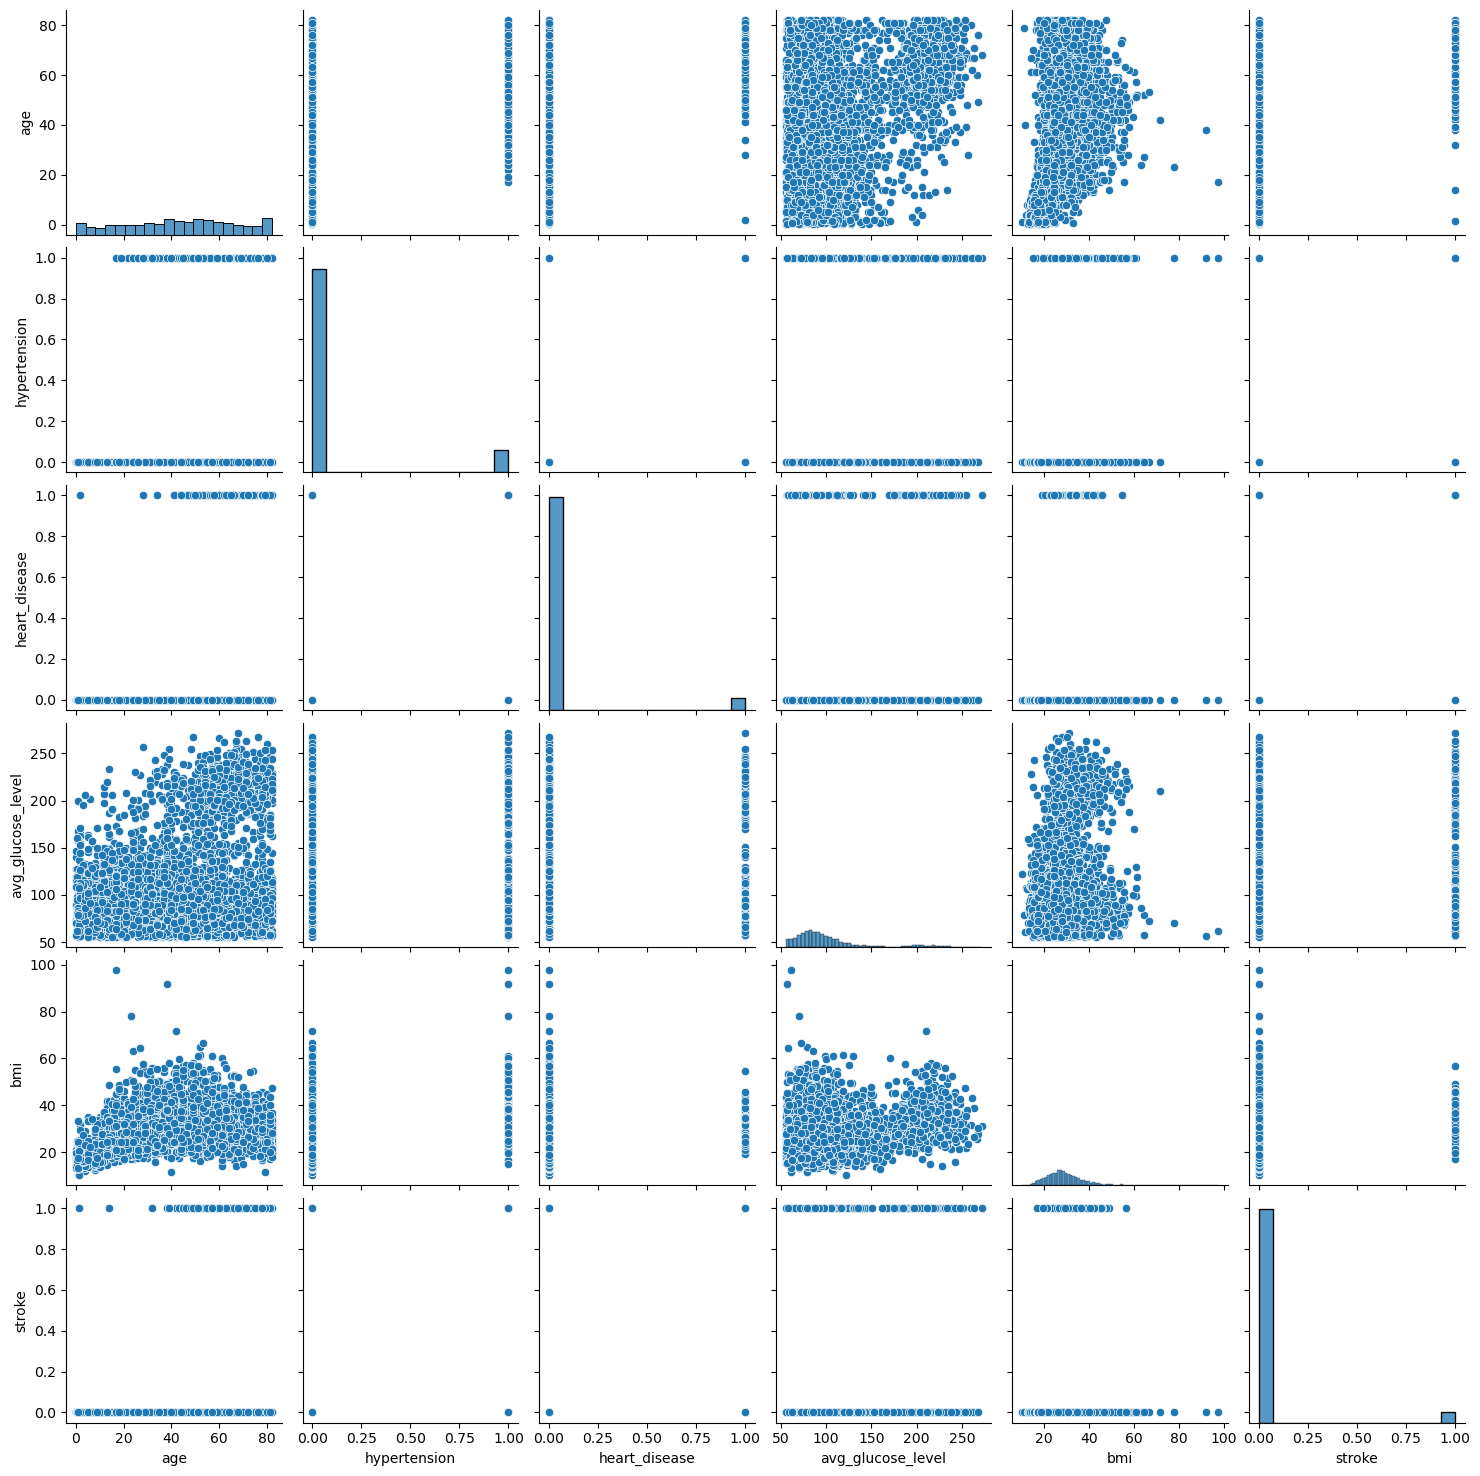

In [15]:
sns.pairplot(df1)
plt.show()

<h5>corr with avg glucose level</h5>

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

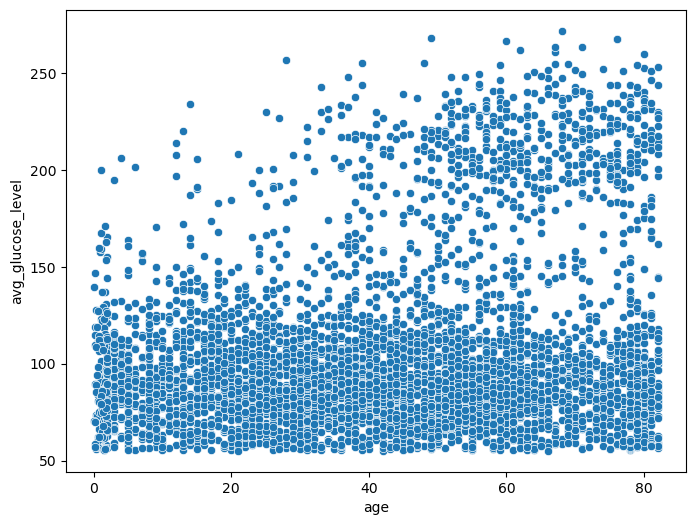

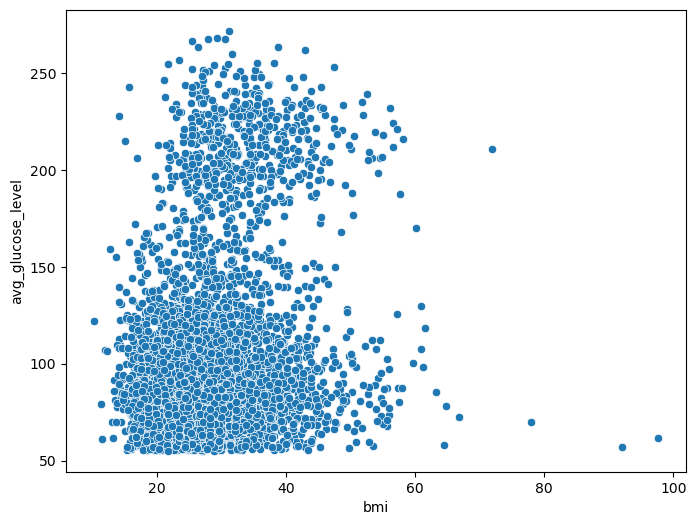

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1 , x = 'age' , y = 'avg_glucose_level')
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df1 , x = 'bmi' , y = 'avg_glucose_level')

* Avg glucose level is high with old people 
* BMI >40 have low avg glucose

<h3>Heat Map</h3>

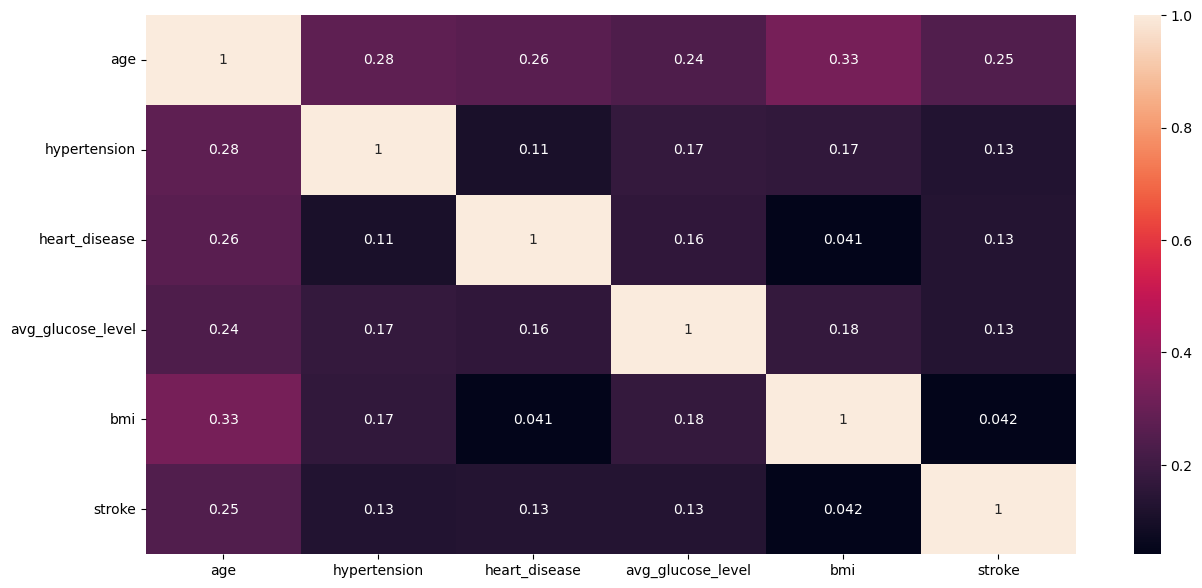

In [17]:
numeric_df = df1.select_dtypes(include=['number'])

plt.figure(figsize=(15,7))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

<h3>Box plots</h3>

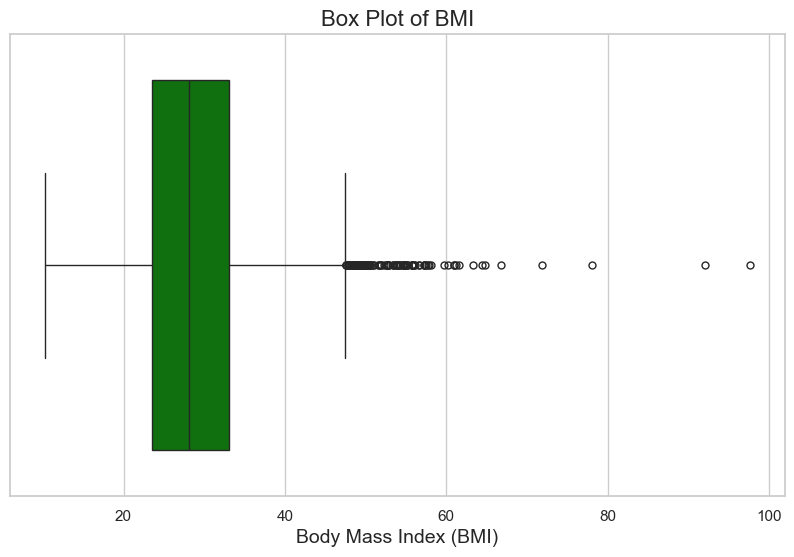

In [18]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))   
sns.boxplot(x='bmi', data=df1, color='green', fliersize=5)
plt.title('Box Plot of BMI', fontsize=16)  
plt.xlabel('Body Mass Index (BMI)', fontsize=14)  
plt.show()  

<h5> The normal distribuation of bmi will be range from 15 to 45 and some values is more than 95 so we should handle it</h5>

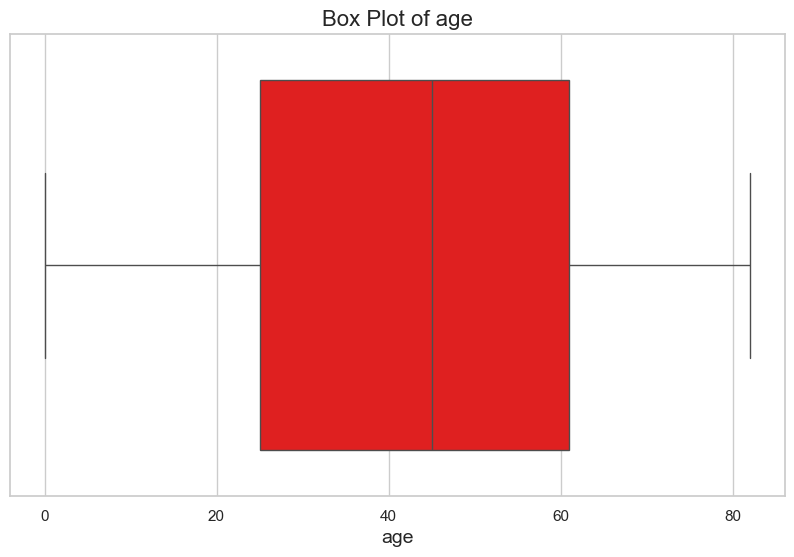

In [19]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))   
sns.boxplot(x='age', data=df1, color='red', fliersize=5)
plt.title('Box Plot of age', fontsize=16)  
plt.xlabel('age', fontsize=14)  
plt.show()  

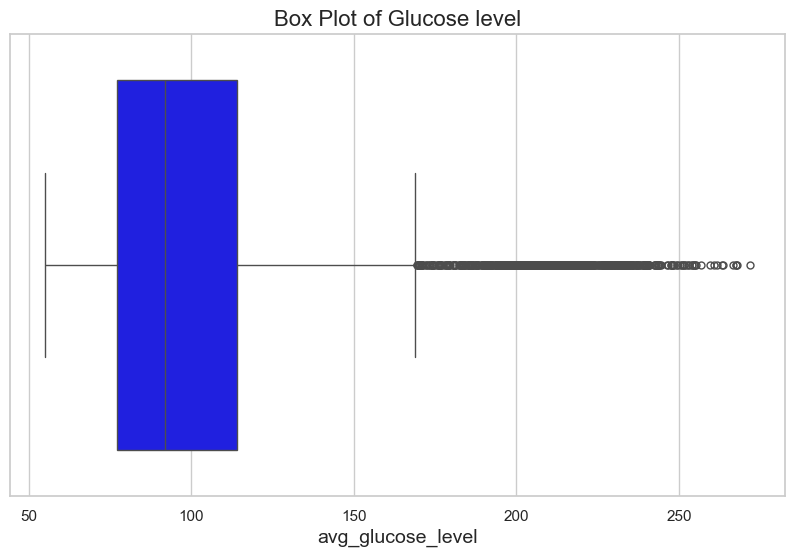

In [20]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))   
sns.boxplot(x='avg_glucose_level', data=df1, color='blue', fliersize=5)
plt.title('Box Plot of Glucose level', fontsize=16)  
plt.xlabel('avg_glucose_level', fontsize=14)  
plt.show()  

<h3>Stroke or not in Categorical Features</h3>

In [21]:
cat_df = df[['gender', 'Residence_type', 'smoking_status', 'stroke']]
summary = cat_df.groupby(['gender', 'Residence_type', 'smoking_status', 'stroke']).size().unstack(fill_value=0)
print(summary)

stroke                                   0   1
gender Residence_type smoking_status          
Female Rural          Unknown          409   9
                      formerly smoked  208  19
                      never smoked     584  27
                      smokes           200   9
       Urban          Unknown          402  16
                      formerly smoked  235  15
                      never smoked     582  36
                      smokes           233  10
Male   Rural          Unknown          335   9
                      formerly smoked  185  15
                      never smoked     333  17
                      smokes           145   9
       Urban          Unknown          351  13
                      formerly smoked  186  21
                      never smoked     303  10
                      smokes           169  14
Other  Rural          formerly smoked    1   0


<h3>Count plots</h3>

<h3>Stroke / Ever Married</h3>

<Axes: xlabel='ever_married', ylabel='count'>

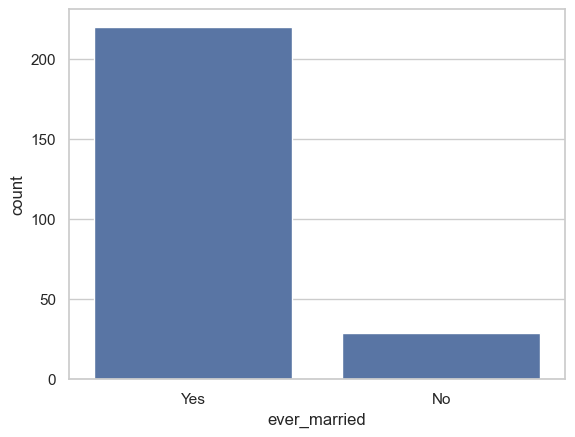

In [22]:
stroke = df1[df1['stroke'] == 1]
sns.countplot(x='ever_married' , data = stroke)

<h3>Stroke / Work Type</h3>

<Axes: xlabel='work_type', ylabel='count'>

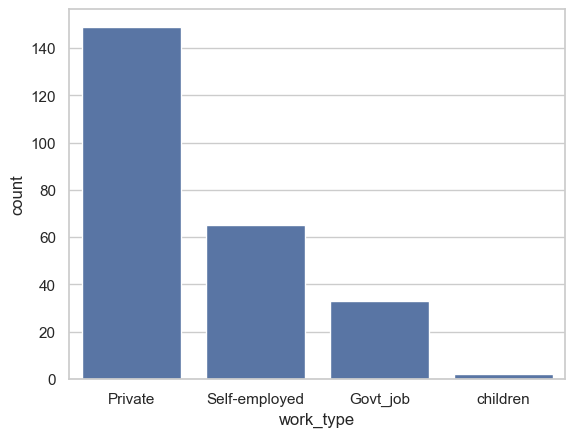

In [23]:
stroke = df1[df1['stroke'] == 1]
sns.countplot(x='work_type' , data = stroke)

<h3>Stroke / smoking status</h3>

<Axes: xlabel='smoking_status', ylabel='count'>

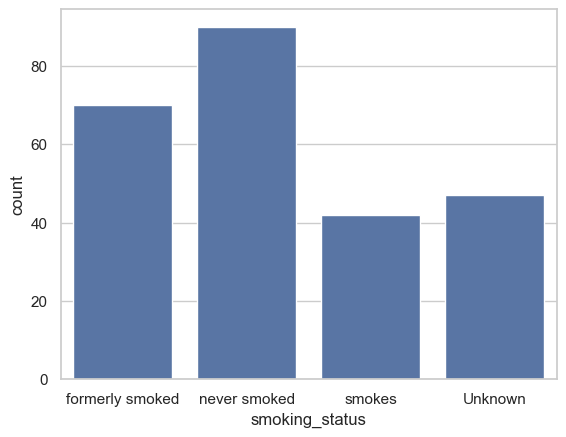

In [24]:
stroke = df1[df1['stroke'] == 1]
sns.countplot(x='smoking_status' , data = stroke)

<h3>Stroke / Residence type</h3>

<Axes: xlabel='Residence_type', ylabel='count'>

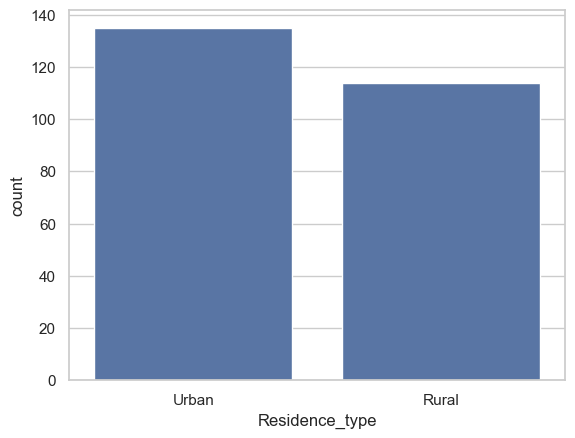

In [25]:
stroke = df1[df1['stroke'] == 1]
sns.countplot(x='Residence_type' , data = stroke)

<h3>Stroke / heart disease</h3>

<Axes: xlabel='heart_disease', ylabel='count'>

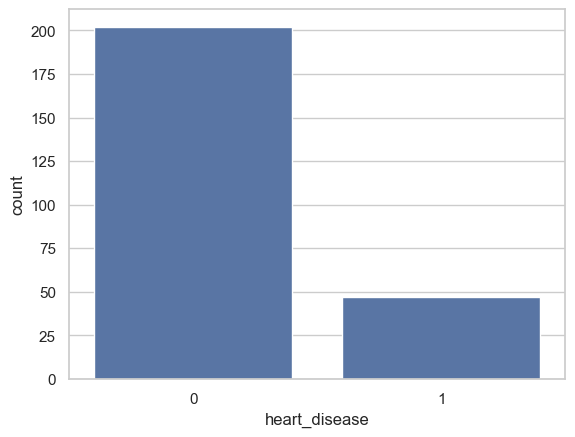

In [26]:
stroke = df1[df1['stroke'] == 1]
sns.countplot(x='heart_disease' , data = stroke)

<h3>Stroke / hypertension</h3>

<Axes: xlabel='hypertension', ylabel='count'>

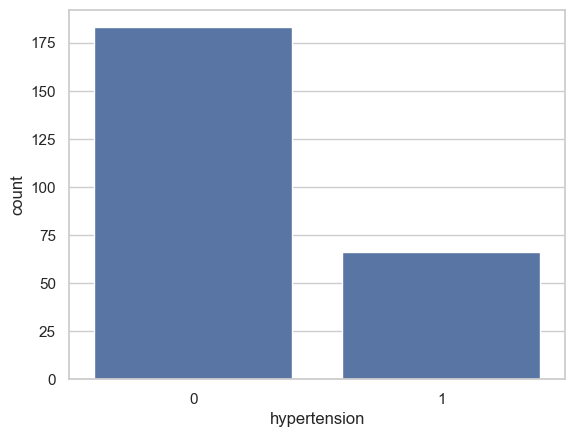

In [27]:
stroke = df1[df1['stroke'] == 1]
sns.countplot(x='hypertension' , data = stroke)

<h2>Final Notes</h2>

* Avg glucose level is high with old people 
* BMI >40 have low avg glucose
* Being unmarried reduces your risk of a stroke
* Being a smoker or a formerly smoker increases your risk of having a stroke
* more than 25% of strok cases They had hypertension

<h1>Data preprocessing</h1>

In [28]:
# Lets deal first with the missing value in bmi but first we should study bmi so the normal bmi is between 15 - 50 so the data more than this must remove
bmi_outliers=df1[df1['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [29]:
df1["bmi"] = df1["bmi"].apply(lambda x: 50 if x>50 else x)

In [30]:
df['bmi'].mean()

28.893236911794666

In [31]:
df1['bmi'].fillna(df['bmi'].mean(), inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17320\2079253863.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [33]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


lets mapping the binary values and onehotencoding for the rest of them

In [34]:
df1["Residence_type"] = df1["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df1["ever_married"] = df1["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df1["gender"] = df1["gender"].apply(lambda x: 1 if x=="Male" else 0)

df1 = pd.get_dummies(data=df1, columns=['smoking_status'])
df1 = pd.get_dummies(data=df1, columns=['work_type'])

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   smoking_status_Unknown          5110 non-null   bool   
 10  smoking_status_formerly smoked  5110 non-null   bool   
 11  smoking_status_never smoked     5110 non-null   bool   
 12  smoking_status_smokes           51

In [36]:
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df1[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df1=df1.drop(columns=columns,axis=1)

In [37]:
df1=df1.merge(scaled, left_index=True, right_index=True, how = "left")


In [38]:
df1.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,1,0,1,1,1,1,False,True,False,False,False,False,True,False,False,2.706375,1.066746,1.051434
1,0,0,0,1,0,1,False,False,True,False,False,False,False,True,False,2.121559,0.013363,0.786070
2,1,0,1,1,0,1,False,False,True,False,False,False,True,False,False,-0.005028,0.506346,1.626390
3,0,0,0,1,1,1,False,False,False,True,False,False,True,False,False,1.437358,0.766044,0.255342
4,0,1,0,1,0,1,False,False,True,False,False,False,False,True,False,1.501184,-0.655458,1.582163


In [39]:
df2 = df1.copy()

Split the data

In [40]:
X = df2.drop(['stroke'], axis=1).values 
y = df2['stroke'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=2)

<h1>Model training</h1>
<h4>Logistic Regression</h4>
<h4>SVM</h4>
<h4>Decision Trees</h4>
<h4>Random Forest</h4>
<h4>XGBoost</h4>
<h4>Neural Networks</h4>
<h4>KNN</h4>


In [42]:
# LogisticRegression
lgr_model = LogisticRegression()
lgr_model.fit(X_train, y_train)
lgr_pred = lgr_model.predict(X_test)
lgr_accuracy = accuracy_score(y_test, lgr_pred)
lgr_conf_matrix = confusion_matrix(y_test, lgr_pred)
svm_class_report = classification_report(y_test, lgr_pred)

print("lgr - Accuracy:", lgr_accuracy)
print("Confusion Matrix:\n", lgr_conf_matrix)
print("Classification Report:\n", svm_class_report)

lgr - Accuracy: 0.9510763209393346
Confusion Matrix:
 [[1458    0]
 [  75    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



c:\Users\Hp\miniconda3\envs\ai-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\miniconda3\envs\ai-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\miniconda3\envs\ai-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# svm
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
svm_class_report = classification_report(y_test, svm_pred)

print("svm - Accuracy:", svm_accuracy)
print("Confusion Matrix:\n", svm_conf_matrix)
print("Classification Report:\n", svm_class_report)

svm - Accuracy: 0.9510763209393346
Confusion Matrix:
 [[1458    0]
 [  75    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



c:\Users\Hp\miniconda3\envs\ai-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\miniconda3\envs\ai-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\miniconda3\envs\ai-env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
#random forst
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_class_report = classification_report(y_test, rf_pred)

print("Random Forest - Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", rf_class_report)

Random Forest - Accuracy: 0.9510763209393346
Confusion Matrix:
 [[1457    1]
 [  74    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.50      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533



In [45]:
#decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
dt_class_report = classification_report(y_test, dt_pred)

print("Decision Tree - Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_conf_matrix)
print("Classification Report:\n", dt_class_report)

Decision Tree - Accuracy: 0.9217221135029354
Confusion Matrix:
 [[1399   59]
 [  61   14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.19      0.19      0.19        75

    accuracy                           0.92      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.92      0.92      0.92      1533



In [46]:
#knn
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_class_report = classification_report(y_test, knn_pred)

print("K-Nearest Neighbors - Accuracy:", knn_accuracy)
print("Confusion Matrix:\n", knn_conf_matrix)
print("Classification Report:\n", knn_class_report)

K-Nearest Neighbors - Accuracy: 0.9497716894977168
Confusion Matrix:
 [[1455    3]
 [  74    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.25      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.60      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



In [47]:
# 7. XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)
xgb_class_report = classification_report(y_test, xgb_pred)

print("XGBoost - Accuracy:", xgb_accuracy)
print("Confusion Matrix:\n", xgb_conf_matrix)
print("Classification Report:\n", xgb_class_report)

XGBoost - Accuracy: 0.9412915851272016
Confusion Matrix:
 [[1437   21]
 [  69    6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.22      0.08      0.12        75

    accuracy                           0.94      1533
   macro avg       0.59      0.53      0.54      1533
weighted avg       0.92      0.94      0.93      1533



In [48]:

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


In [49]:
# 7. Neural Network 
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)

print("Neural Network - Accuracy:", nn_accuracy)


Epoch 1/10
90/90 [==============================] - 2s 9ms/step - loss: 0.3217 - accuracy: 0.9137 - val_loss: 0.2052 - val_accuracy: 0.9441
Epoch 2/10
90/90 [==============================] - 0s 3ms/step - loss: 0.1640 - accuracy: 0.9532 - val_loss: 0.1840 - val_accuracy: 0.9441
Epoch 3/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1539 - accuracy: 0.9532 - val_loss: 0.1834 - val_accuracy: 0.9441
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1500 - accuracy: 0.9532 - val_loss: 0.1831 - val_accuracy: 0.9441
Epoch 5/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1481 - accuracy: 0.9532 - val_loss: 0.1818 - val_accuracy: 0.9441
Epoch 6/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1462 - accuracy: 0.9532 - val_loss: 0.1811 - val_accuracy: 0.9441
Epoch 7/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1458 - accuracy: 0.9532 - val_loss: 0.1815 - val_accuracy: 0.9441
Epoch 8/10
90/90 [==

Logistic Regression (LGR):

Accuracy: 0.9511 (95.11%)
Pros: High accuracy
Cons: Poor performance on minority class (class 1)


SVM:

Accuracy: 0.9511 (95.11%)
Performance identical to Logistic Regression
Cons: No prediction for minority class


Random Forest:

Accuracy: 0.9504 (95.04%)
Slightly better minority class performance
Predicted 1 instance of class 1


Decision Tree:

Accuracy: 0.9191 (91.91%)
Lowest accuracy among the models
Managed to predict 13 instances of class 1


K-Nearest Neighbors (KNN):

Accuracy: 0.9498 (94.98%)
Similar to Random Forest
Predicted 1 instance of class 1


XGBoost:

Accuracy: 0.9413 (94.13%)
Predicted 6 instances of class 1
Slightly better minority class performance


Neural Network:

Accuracy: 0.9504 (95.04%)
Stable performance across epochs
Validation accuracy consistently at 94.41%



The best model is XGboost

Data is unbalacne lets balance it 

In [50]:
df3 = df1.copy()

In [ ]:

X = df3.drop('stroke', axis=1)  
y = df3['stroke']



smote_tomek = SMOTETomek(random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X, y)

print("Original Distribution:")
print(y.value_counts())

print("\nSMOTE+Tomek Distribution:")
print(pd.Series(y_smote_tomek).value_counts())



Original Distribution:
stroke
0    4861
1     249
Name: count, dtype: int64

SMOTE+Tomek Distribution:
stroke
1    4847
0    4847
Name: count, dtype: int64


In [85]:
X_train_smote_tomek, X_test_smote_tomek, y_train_smote_tomek, y_test_smote_tomek = train_test_split(
    X_smote_tomek, y_smote_tomek, test_size=0.2, random_state=42, stratify=y_smote_tomek)


In [ ]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train_smote_tomek, y_train_smote_tomek)
lr_pred = lr_model.predict(X_test_smote_tomek)
lr_accuracy = accuracy_score(y_test_smote_tomek, lr_pred)
print("Logistic Regression - Accuracy:", lr_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test_smote_tomek, lr_pred))
print("Classification Report:\n", classification_report(y_test_smote_tomek, lr_pred))


Logistic Regression - Accuracy: 0.8251676121712223
Confusion Matrix:
 [[782 188]
 [151 818]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       970
           1       0.81      0.84      0.83       969

    accuracy                           0.83      1939
   macro avg       0.83      0.83      0.83      1939
weighted avg       0.83      0.83      0.83      1939



In [ ]:
#XGB
xgbel_model = xgb.XGBClassifier(eval_metric='mlogloss')
xgbel_model.fit(X_train_smote_tomek, y_train_smote_tomek)
xgbel_pred = xgbel_model.predict(X_test_smote_tomek)
xgbel_accuracy = accuracy_score(y_test_smote_tomek, xgbel_pred)
xgbel_conf_matrix = confusion_matrix(y_test_smote_tomek, xgbel_pred)
xgbel_class_report = classification_report(y_test_smote_tomek, xgbel_pred)

print("XGBoost - Accuracy:", xgbel_accuracy)
print("Confusion Matrix:\n", xgbel_conf_matrix)
print("Classification Report:\n", xgbel_class_report)

XGBoost - Accuracy: 0.9437854564208354
Confusion Matrix:
 [[911  59]
 [ 50 919]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       970
           1       0.94      0.95      0.94       969

    accuracy                           0.94      1939
   macro avg       0.94      0.94      0.94      1939
weighted avg       0.94      0.94      0.94      1939



In [ ]:
#random forest
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train_smote_tomek, y_train_smote_tomek)
rfc_pred = rfc_model.predict(X_test_smote_tomek)
rfc_accuracy = accuracy_score(y_test_smote_tomek, rfc_pred)
print("Random Forest - Accuracy:", rfc_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test_smote_tomek, rfc_pred))
print("Classification Report:\n", classification_report(y_test_smote_tomek, rfc_pred))


Random Forest - Accuracy: 0.9510056730273336
Confusion Matrix:
 [[892  78]
 [ 17 952]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       970
           1       0.92      0.98      0.95       969

    accuracy                           0.95      1939
   macro avg       0.95      0.95      0.95      1939
weighted avg       0.95      0.95      0.95      1939



In [ ]:
#svm
svmc_model = SVC(kernel='rbf', probability=True)
svmc_model.fit(X_train_smote_tomek, y_train_smote_tomek)
svmc_pred = svmc_model.predict(X_test_smote_tomek)
svmc_accuracy = accuracy_score(y_test_smote_tomek, svmc_pred)
print("SVM - Accuracy:", svmc_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test_smote_tomek, svmc_pred))
print("Classification Report:\n", classification_report(y_test_smote_tomek, svmc_pred))

SVM - Accuracy: 0.8808664259927798
Confusion Matrix:
 [[799 171]
 [ 60 909]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       970
           1       0.84      0.94      0.89       969

    accuracy                           0.88      1939
   macro avg       0.89      0.88      0.88      1939
weighted avg       0.89      0.88      0.88      1939



In [ ]:
# Train KNN
knnc_model = KNeighborsClassifier(n_neighbors=3)
knnc_model.fit(X_train_smote_tomek, y_train_smote_tomek)
knnc_pred = knnc_model.predict(X_test_smote_tomek)
knnc_accuracy = accuracy_score(y_test_smote_tomek, knnc_pred)
print("KNN - Accuracy:", knnc_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test_smote_tomek, knnc_pred))
print("Classification Report:\n", classification_report(y_test_smote_tomek, knnc_pred))


KNN - Accuracy: 0.9190304280556988
Confusion Matrix:
 [[829 141]
 [ 16 953]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       970
           1       0.87      0.98      0.92       969

    accuracy                           0.92      1939
   macro avg       0.93      0.92      0.92      1939
weighted avg       0.93      0.92      0.92      1939



In [ ]:
#  Decision Tree
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_smote_tomek, y_train_smote_tomek)
dtc_pred = dtc_model.predict(X_test_smote_tomek)
dtc_accuracy = accuracy_score(y_test_smote_tomek, dtc_pred)
print("Decision Tree - Accuracy:", dtc_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test_smote_tomek, dtc_pred))
print("Classification Report:\n", classification_report(y_test_smote_tomek, dtc_pred))


Decision Tree - Accuracy: 0.9118102114492006
Confusion Matrix:
 [[874  96]
 [ 75 894]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       970
           1       0.90      0.92      0.91       969

    accuracy                           0.91      1939
   macro avg       0.91      0.91      0.91      1939
weighted avg       0.91      0.91      0.91      1939



in the end randomforst and xgboost is the best so we will save the xgboost model

In [ ]:
#joblib.dump(xgbel_model , 'XGBoost.pkl')

['XGBoost.pkl']